# EDA: Combined per 60 statistics
Goal is to determine what statistics about goalies and skaters may be useful in predicting goals scored for each skater's upcoming games.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Read in rolling per60 statistics

In [5]:
# Read in data
per60_2021 = pd.read_csv('../data/stats/past_seasons/combined_per60_roll15_2021.csv')
per60_2022 = pd.read_csv('../data/stats/past_seasons/combined_per60_roll15_2022.csv')
per60_all = pd.concat([per60_2021, per60_2022], axis=0)

In [6]:
per60_2021.sample(5)

,s_player_id,s_name,s_age,season,s_game_num,date,s_team,s_opponent,s_home_away_status,s_result,...,g_age,g_game_num,decision,g_n_completed_games,GA_60,SA_60,SV_60,total_shutout,SV_perc,g_avg_TOI
29026,/t/treniya01,Yakov Trenin,24,2021,25,2021-03-28,NSH,CHI,0,W,...,27,10,L,9,3.142685,32.293799,29.151114,1.0,0.902685,61.518519
3750,/c/carlsjo01,John Carlson,31,2021,34,2021-03-28,WSH,NYR,1,W,...,31,8,L,7,2.215969,24.217376,22.001407,1.0,0.908497,54.152381
4088,/c/cernaer01,Erik Cernak,23,2021,46,2021-05-10,TBL,FLA,0,L,...,26,23,W,22,2.056085,26.454966,24.398881,2.0,0.922280,58.363333
21126,/n/nurseda01,Darnell Nurse,25,2021,9,2021-01-28,EDM,TOR,1,L,...,31,7,W,6,2.842545,27.254993,24.412448,0.0,0.895706,59.805556
17451,/l/lindhel01,Elias Lindholm,26,2021,47,2021-04-24,CGY,MTL,1,W,...,21,1,L,0,NaN,NaN,NaN,0.0,NaN,NaN


0    66734
1    10385
2     1149
3      151
4       10
5        1
Name: G, dtype: int64


<Axes: xlabel='G', ylabel='count'>

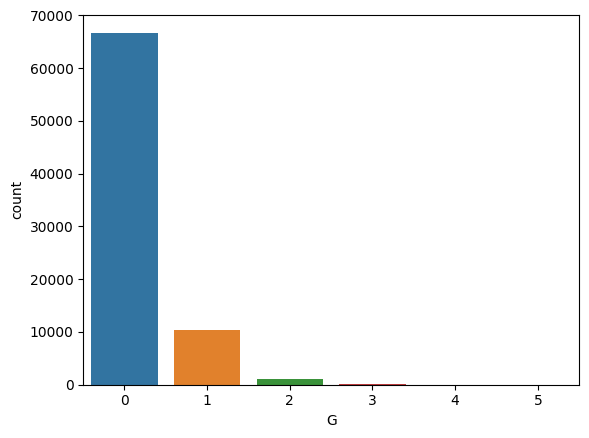

In [7]:
print(per60_all['G'].value_counts())
sns.countplot(data=per60_all, x = 'G')

In [8]:
def aggregate(df, col):
    agg = df.groupby('G')[col].mean().reset_index()
    display(agg)
    sns.displot(data = per60_2021, x = col, hue = 'G', kind='kde', fill = True)
    return

In [9]:
per60_all.columns

Index(['s_player_id', 's_name', 's_age', 'season', 's_game_num', 'date',
       's_team', 's_opponent', 's_home_away_status', 's_result', 'G',
       's_n_completed_games', 'G_60', 'A_60', 'P_60', 'rating_60', 'PIM_60',
       'EVG_60', 'PPG_60', 'SHG_60', 'GWG_60', 'EVA_60', 'PPA_60', 'SHA_60',
       'S_60', 'shifts_60', 'HIT_60', 'BLK_60', 'FOW_60', 'FOL_60',
       's_avg_TOI', 'g_player_id', 'g_name', 'g_age', 'g_game_num', 'decision',
       'g_n_completed_games', 'GA_60', 'SA_60', 'SV_60', 'total_shutout',
       'SV_perc', 'g_avg_TOI'],
      dtype='object')

In [24]:
per60_inputs = per60_all.loc[:, ['G', 's_home_away_status', 'G_60', 'A_60', 'P_60', 'rating_60', 'PIM_60',
       'EVG_60', 'PPG_60', 'SHG_60', 'GWG_60', 'EVA_60', 'PPA_60', 'SHA_60',
       'S_60', 'shifts_60', 'HIT_60', 'BLK_60', 'FOW_60', 'FOL_60', 'GA_60', 'SA_60', 'SV_60', 'total_shutout',
       'SV_perc']]


scaler = StandardScaler()
scaler.fit(per60_inputs)

per60_inputs_scaled = scaler.transform(per60_inputs)

per60_inputs_scaled = pd.DataFrame(per60_inputs_scaled, columns = per60_inputs.columns)
display(per60_inputs_scaled)
print(per60_inputs_scaled.columns)

,G,s_home_away_status,G_60,A_60,P_60,rating_60,PIM_60,EVG_60,PPG_60,SHG_60,...,shifts_60,HIT_60,BLK_60,FOW_60,FOL_60,GA_60,SA_60,SV_60,total_shutout,SV_perc
0,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.046111,-0.871739,-0.914511,-0.704581,-0.338900
1,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,-0.421106,-1.199607,-1.425765,-0.593194,-0.637458,-0.113949,-0.211695,-0.198371,1.603942,0.033447
2,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.050683,1.870429,1.281062,-0.704581,-1.864871
3,-0.393451,0.999898,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,1.036996,0.769665,0.824464,1.475912,3.755173,NaN,NaN,NaN,-0.704581,NaN
4,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,1.317925,1.209842,2.979365,1.432085,3.662129,-0.592644,1.595669,1.830193,-0.704581,1.065970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78425,-0.393451,-1.000102,0.324605,-0.193866,0.052563,0.036977,0.222574,0.128093,0.595692,-0.195692,...,-0.240724,0.802501,-0.205632,-0.593194,-0.548141,-0.055879,-0.619284,-0.644334,0.449681,-0.206877
78426,1.947673,0.999898,0.330817,-0.188712,0.059746,0.036977,0.226794,0.133057,0.600806,-0.195692,...,-0.371385,1.013647,-0.506121,-0.593194,-0.547697,0.034965,-0.609564,-0.654981,0.449681,-0.298839
78427,-0.393451,-1.000102,0.746177,-0.191054,0.298244,0.213702,0.035530,0.632065,0.598482,-0.195692,...,-0.464530,0.874843,-0.814045,-0.593194,-0.577752,1.285928,1.149361,0.923045,-0.704581,-0.705458
78428,-0.393451,-1.000102,0.751112,0.159967,0.545710,0.568715,0.037485,0.636501,0.601529,-0.195692,...,-0.400509,0.746733,-0.658860,-0.593194,-0.577576,0.901494,0.637729,0.468776,-0.704581,-0.583218


Index(['G', 's_home_away_status', 'G_60', 'A_60', 'P_60', 'rating_60',
       'PIM_60', 'EVG_60', 'PPG_60', 'SHG_60', 'GWG_60', 'EVA_60', 'PPA_60',
       'SHA_60', 'S_60', 'shifts_60', 'HIT_60', 'BLK_60', 'FOW_60', 'FOL_60',
       'GA_60', 'SA_60', 'SV_60', 'total_shutout', 'SV_perc'],
      dtype='object')


In [33]:
#per60_inputs_scaled['G_orig'] = per60_inputs.loc[:,'G']
per60_inputs_scaled['1_or_more_G'] = 0

mask = per60_inputs['G'] >= 1
mask = mask.to_numpy()

per60_inputs_scaled.loc[mask, '1_or_more_G'] = 1

,G,s_home_away_status,G_60,A_60,P_60,rating_60,PIM_60,EVG_60,PPG_60,SHG_60,...,HIT_60,BLK_60,FOW_60,FOL_60,GA_60,SA_60,SV_60,total_shutout,SV_perc,1_or_more_G
0,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.046111,-0.871739,-0.914511,-0.704581,-0.338900,0
1,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,-1.199607,-1.425765,-0.593194,-0.637458,-0.113949,-0.211695,-0.198371,1.603942,0.033447,0
2,-0.393451,0.999898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.050683,1.870429,1.281062,-0.704581,-1.864871,0
3,-0.393451,0.999898,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,0.769665,0.824464,1.475912,3.755173,NaN,NaN,NaN,-0.704581,NaN,0
4,-0.393451,-1.000102,-0.926554,-1.231833,-1.394085,0.036977,-0.627184,-0.871726,-0.434301,-0.195692,...,1.209842,2.979365,1.432085,3.662129,-0.592644,1.595669,1.830193,-0.704581,1.065970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78425,-0.393451,-1.000102,0.324605,-0.193866,0.052563,0.036977,0.222574,0.128093,0.595692,-0.195692,...,0.802501,-0.205632,-0.593194,-0.548141,-0.055879,-0.619284,-0.644334,0.449681,-0.206877,0
78426,1.947673,0.999898,0.330817,-0.188712,0.059746,0.036977,0.226794,0.133057,0.600806,-0.195692,...,1.013647,-0.506121,-0.593194,-0.547697,0.034965,-0.609564,-0.654981,0.449681,-0.298839,1
78427,-0.393451,-1.000102,0.746177,-0.191054,0.298244,0.213702,0.035530,0.632065,0.598482,-0.195692,...,0.874843,-0.814045,-0.593194,-0.577752,1.285928,1.149361,0.923045,-0.704581,-0.705458,0
78428,-0.393451,-1.000102,0.751112,0.159967,0.545710,0.568715,0.037485,0.636501,0.601529,-0.195692,...,0.746733,-0.658860,-0.593194,-0.577576,0.901494,0.637729,0.468776,-0.704581,-0.583218,0


In [34]:
per60_inputs_agg = per60_inputs_scaled.groupby('1_or_more_G').agg(np.mean).reset_index()
per60_inputs_agg

,1_or_more_G,G,s_home_away_status,G_60,A_60,P_60,rating_60,PIM_60,EVG_60,PPG_60,...,shifts_60,HIT_60,BLK_60,FOW_60,FOL_60,GA_60,SA_60,SV_60,total_shutout,SV_perc
0,0,-0.393451,-0.005796,-0.068161,-0.050893,-0.074871,-0.014634,0.010250,-0.052355,-0.056296,...,0.039444,0.029196,0.055342,-0.034696,-0.033549,-0.009634,-0.010000,-0.008390,0.005629,0.005817
1,1,2.244918,0.033072,0.387637,0.289436,0.425800,0.083223,-0.058293,0.297750,0.320163,...,-0.224324,-0.166044,-0.314738,0.197318,0.190795,0.055041,0.057132,0.047932,-0.032117,-0.033231


In [35]:
input_test = per60_inputs_agg.melt(id_vars=['1_or_more_G'],
       var_name='metric',
       value_name = 'value').pivot(index='metric', columns='1_or_more_G', values = 'value').reset_index()
input_test['diff'] = input_test.iloc[:,2] - input_test.iloc[:,1]
input_test

1_or_more_G,metric,0,1,diff
0,A_60,-0.050893,0.289436,0.340329
1,BLK_60,0.055342,-0.314738,-0.370080
2,EVA_60,-0.035425,0.201465,0.236890
3,EVG_60,-0.052355,0.297750,0.350105
4,FOL_60,-0.033549,0.190795,0.224344
5,FOW_60,-0.034696,0.197318,0.232014
6,G,-0.393451,2.244918,2.638368
7,GA_60,-0.009634,0.055041,0.064676
8,GWG_60,-0.037011,0.210485,0.247496
9,G_60,-0.068161,0.387637,0.455798


In [37]:
input_test.sort_values('diff',  ascending = False)

1_or_more_G,metric,0,1,diff
6,G,-0.393451,2.244918,2.638368
14,P_60,-0.074871,0.425800,0.500671
20,S_60,-0.072132,0.410225,0.482358
9,G_60,-0.068161,0.387637,0.455798
13,PPG_60,-0.056296,0.320163,0.376459
3,EVG_60,-0.052355,0.297750,0.350105
0,A_60,-0.050893,0.289436,0.340329
12,PPA_60,-0.046077,0.262044,0.308121
8,GWG_60,-0.037011,0.210485,0.247496
2,EVA_60,-0.035425,0.201465,0.236890
